NOTE this notebook is just to fix some numbers for in the paper... Here we go!

# Number one: energy range

In [7]:
%run function_definitions.ipynb

/home/erik/anaconda3/envs/pax/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


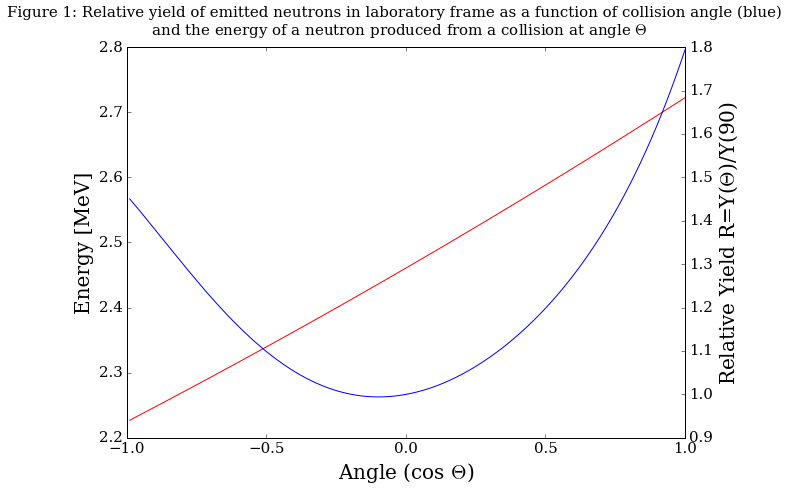

In [8]:
xE_points = []
yE_points = []
xCS_points = []
yCS_points = []
i =-1
for i in range (0, 200):
    x=(1-i/100)
    yE_points.append(2.46073+(0.24848*x+0.01282*np.power(x,2)+0.00031*np.power(x,3)))
    xE_points.append(x)
    yCS_points.append((1+0.11787*x+0.58355*np.power(x,2)+-0.11353*np.power(x,3)+0.0422*np.power(x,4)+0.16359*np.power(x,5)))
    xCS_points.append(x)

fig, ax1 = plt.subplots()
fig.suptitle("Figure 1: Relative yield of emitted neutrons in laboratory frame as a function of collision angle (blue) \n and the energy of a neutron produced from a collision at angle $\Theta$", size=15)
ax1.plot(xE_points, yE_points, color='red')
ax1.set_xlabel("Angle (cos $\Theta$)")
ax1.set_ylabel("Energy [MeV]")
ax1.set_ylim(2.2,2.8)
ax1.set_xlim(-1, 1)
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(xCS_points, yCS_points, color='blue')
#ax2.set_xlabel("Angle (cos $\sigma$)")
ax2.set_ylabel("Relative Yield R=Y($\Theta$)/Y(90)")
ax2.set_ylim(0.9, 1.8)
ax2.set_xlim(-1, 1)
plt.show()

In [9]:
min(yE_points)

2.2269988893099999

In [10]:
max(yE_points)

2.72234

In [11]:
def yE(x):
    return 2.46073+(0.24848*x+0.01282*np.power(x,2)+0.00031*np.power(x,3))

In [12]:
# Minimum energy
yE(-1)

2.2247599999999998

In [13]:
# Maximum energy
yE(+1)

2.72234

# Scaling for simulation

In [14]:
# DD numbers

# OLD NUMBERS
# n_sim_dd   = 210e7 # Mail from JP September 8
# n_at_ne_dd = 104603 # len(sim_energies)
# a_dd = 0.005101508202512539

# NEW NUMBERS (11/11)
n_sim_dd = 4e9 # Mail from Jacques for new dataset, Nov 11
n_at_ne_dd = 116745 # NE213_Combined
a_dd = 0.004370339587567051 # From fit, rebinned version (checked)

# To check if this makes sense between datasets.
f_useful_dd = n_at_ne_dd / n_sim_dd


In [15]:
# DT numbers
n_sim_dt   = 9.5e8 # Mail from JP Nov 1
n_at_ne_dt = 20044 # Dataset from Nov 1; this is at the wrong energy :(
f_useful_dt = n_at_ne_dt / n_sim_dt # Fraction of events that is useful
a_dt = 0.043077878353139365 # From fit

In [16]:
print(f_useful_dd, f_useful_dt)
# DD and DT should be more or less the same

2.918625e-05 2.1098947368421054e-05


In [17]:
# OK, here goes.
# Normalize scaling factor per number of events.
# Does this make sense? Well, suppose you have a giant number of events. Then your scaling factor becomes
# smaller and smaller. So, this should be up-corrected, i.e. multiplied by something proportional
# to the number of simulated events.
#
# Other way to look at it: the spectrum should be normalized before fitting, then the scaling factor corrects for
# this happening.
#
# Check: a INcreases if you DEcrease the statistics!
a_eff_dd = a_dd * n_sim_dd
a_eff_dt = a_dt * n_sim_dt

In [18]:
# Then, there is rebinning. 
# Lets get this straight. For the high energy, because of rebinning, the event rate is measured per 119 keVee.
# However, we use the same rebinning for the calculated response function and the simulated response! Right?
# NO. We do NOT rebin the response function! We calculate it using the reponse function.
# So. The factor a you need for dt is actually LOWER since you rebinned to make all values higher.
# This will give you a factor 50 or 25, depending on rebinning (discussed later)
a_eff_dt = a_eff_dt / 50
# 
# There is one final thing, we *may* be a factor of two off now :( because of the factor of 2 rebinning. What to do?
# Well, how about checking the non-rebinned factor?
# I checked. It is the same. So 50 is correct.

In [19]:
# Does this make sense? A large value of a means that you measure MORE. 
(a_eff_dt/a_eff_dd)

0.04682014248035196

### Comparison to AZ

In [20]:
# This number is a bit higher that what AZ finds but he compares 2-2.8 MeV to 2.5 - 14.
# Lets check this.

In [21]:
def read_simulation(fn, col_n = 0):    
    # Relevant imports to reading in 
    import ROOT
    import root_numpy as rn

    # Actually read the root file
    f = ROOT.TFile(fn)
    treenames = rn.list_trees(fn)
    assert len(treenames) == 1
    tree = f.Get(treenames[0])
    data = rn.tree2array(tree)

    # Somehow the data is stored in the form of an array of tuples... wtf? So here's a hack to get it out!
    sim_energies = np.array([d[col_n] for d in data])
    print('Read a total of %d events from file %s.' % (len(sim_energies), fn))
    return sim_energies

In [22]:
e_at_ne_dt = np.concatenate([
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum2.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum3.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum4.root')])/1000

Read a total of 3808 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum.root.
Read a total of 3871 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum2.root.
Read a total of 6103 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum3.root.
Read a total of 6262 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum4.root.


In [25]:
e_at_ne_dd = read_simulation('./simu/161111_DD/NE213_DD_Combined.root')/1000

Read a total of 116745 events from file ./simu/161111_DD/NE213_DD_Combined.root.


In [26]:
n_in_range_dd = len(e_at_ne_dd[(e_at_ne_dd > 2.0) & (e_at_ne_dd < 2.8) ])
n_in_range_dt = len(e_at_ne_dt[(e_at_ne_dt > 2.5)])

In [27]:
f_in_range_dt = n_in_range_dt / len(e_at_ne_dt)

In [28]:
f_in_range_dd = n_in_range_dd / len(e_at_ne_dd)

In [29]:
((a_eff_dt * f_in_range_dt) / (a_eff_dd * f_in_range_dd)) # Fraction in range almost cancels (by chance?)

0.04384364075776577